## ప్రాథమిక పాండాస్ ఉదాహరణలు

ఈ నోట్‌బుక్ మీకు కొన్ని ప్రాథమిక పాండాస్ కాన్సెప్ట్‌లను చూపిస్తుంది. మేము సాధారణ డేటా సైన్స్ లైబ్రరీలను దిగుమతి చేసుకోవడం నుండి ప్రారంభిస్తాము:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### సిరీస్

సిరీస్ అనేది ఒక జాబితా లేదా 1D-అర్రే లాంటిది, కానీ సూచికతో ఉంటుంది. అన్ని ఆపరేషన్లు సూచిక-సమానంగా ఉంటాయి.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


సిరీస్ యొక్క తరచుగా ఉపయోగాలలో ఒకటి **సమయ సిరీస్**. సమయ సిరీస్‌లో, సూచికకు ప్రత్యేకమైన నిర్మాణం ఉంటుంది - సాధారణంగా తేదీల లేదా తేదీ-సమయాల శ్రేణి. `pd.date_range` ఉపయోగించి ఇలాంటి సూచికను సృష్టించవచ్చు.

ప్రతి రోజు కొనుగోలు చేసిన ఉత్పత్తి పరిమాణాన్ని చూపించే ఒక సిరీస్ ఉందని అనుకుందాం, మరియు ప్రతి ఆదివారం మన కోసం ఒక ఐటమ్ తీసుకోవాల్సి ఉంటుందని మనకు తెలుసు. సిరీస్ ఉపయోగించి దాన్ని ఎలా మోడల్ చేయాలో ఇక్కడ ఉంది:


Length of index is 366


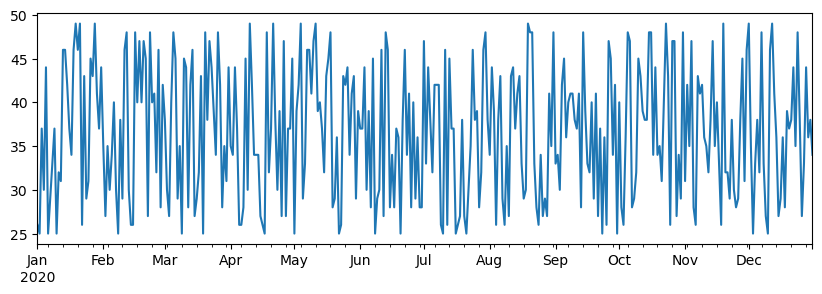

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


మీరు చూడగలిగినట్లుగా, ఇక్కడ మనకు సమస్యలు ఉన్నాయి, ఎందుకంటే వారానికి సంబంధించిన సిరీస్‌లో పేర్కొనబడని రోజులు లేని (`NaN`)గా పరిగణించబడతాయి, మరియు `NaN`ని ఒక సంఖ్యకు జోడించడం అంటే `NaN` వస్తుంది. సరైన ఫలితాన్ని పొందడానికి, సిరీస్‌ను జోడించినప్పుడు `fill_value`ని నిర్దేశించాలి:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


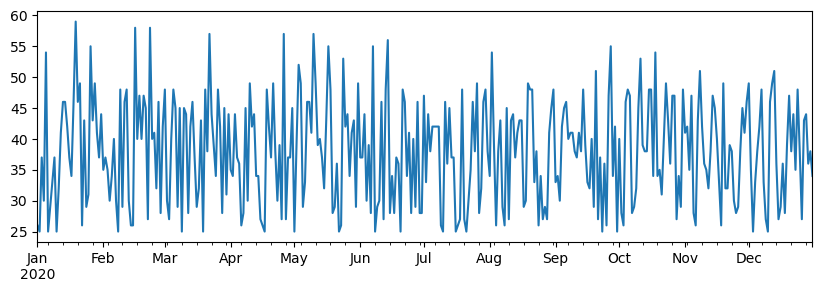

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

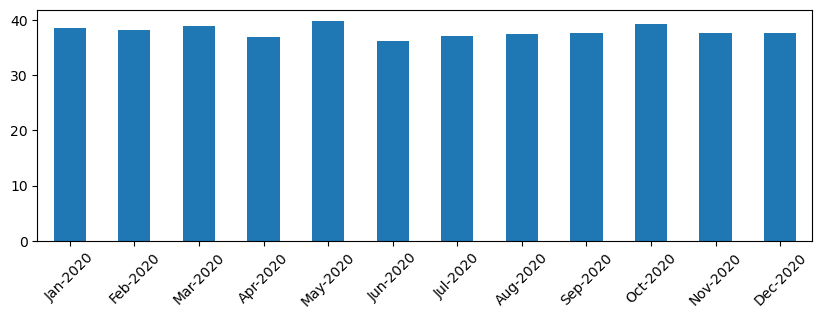

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

డేటాఫ్రేమ్ అనేది మౌలికంగా ఒకే సూచికతో ఉన్న సిరీస్‌ల సేకరణ. మనం అనేక సిరీస్‌లను కలిపి ఒక డేటాఫ్రేమ్‌గా మార్చవచ్చు. పైగా నిర్వచించిన `a` మరియు `b` సిరీస్‌లను తీసుకుంటే:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

మేము సిరీస్‌లను కాలమ్స్‌గా కూడా ఉపయోగించవచ్చు, మరియు డిక్షనరీ ఉపయోగించి కాలమ్ పేర్లను నిర్దేశించవచ్చు:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

అదే ఫలితం ట్రాన్స్‌పోజ్ చేయడం ద్వారా (మరియు తరువాత కాలమ్స్ పేర్లను మార్చడం, మునుపటి ఉదాహరణకు సరిపోల్చడానికి) సాధించవచ్చు:


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**డేటాఫ్రేమ్ నుండి కాలమ్స్ ఎంచుకోవడం** ఇలా చేయవచ్చు:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**ఫిల్టర్ వ్యక్తీకరణ ఆధారంగా వరుసలను ఎంపిక చేయడం:**


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

ఇది ఎలా పనిచేస్తుందంటే, `df['A']<5` అనే వ్యక్తీకరణ ఒక బూలియన్ సిరీస్‌ను ఇస్తుంది, ఇది సిరీస్‌లోని ప్రతి మూలకం కోసం వ్యక్తీకరణ `True` కాదా `False` కాదా అని సూచిస్తుంది. సిరీస్‌ను సూచికగా ఉపయోగించినప్పుడు, అది DataFrame లోని వరుసల ఉపసమితిని ఇస్తుంది. కాబట్టి, యాదృచ్ఛిక Python బూలియన్ వ్యక్తీకరణను ఉపయోగించడం సాధ్యం కాదు, ఉదాహరణకు, `df[df['A']>5 and df['A']<7]` అని వ్రాయడం తప్పు. దాని బదులు, బూలియన్ సిరీస్‌పై ప్రత్యేకమైన `&` ఆపరేషన్‌ను ఉపయోగించాలి:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**కొత్త గణనీయమైన కాలమ్స్ సృష్టించడం**. మన DataFrame కోసం సులభంగా గణనీయమైన కొత్త కాలమ్స్ సృష్టించవచ్చు సూటిగా అర్థమయ్యే వ్యక్తీకరణలను ఉపయోగించి. క్రింది కోడ్ A యొక్క సగటు విలువ నుండి విభేదాన్ని లెక్కిస్తుంది.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

నిజానికి జరుగుతున్నది ఏమిటంటే మనం ఒక శ్రేణిని గణించుకుంటున్నాము, ఆ తర్వాత ఆ శ్రేణిని ఎడమవైపు భాగానికి కేటాయించి, మరో కాలమ్ సృష్టించడం.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**సంఖ్యల ఆధారంగా వరుసలను ఎంచుకోవడం** `iloc` నిర్మాణం ఉపయోగించి చేయవచ్చు. ఉదాహరణకు, DataFrame నుండి మొదటి 5 వరుసలను ఎంచుకోవడానికి:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**గ్రూపింగ్** అనేది Excelలో *pivot tables* లాంటి ఫలితాన్ని పొందడానికి తరచుగా ఉపయోగిస్తారు. ఉదాహరణకు, మనం ప్రతి ఇచ్చిన `LenB` సంఖ్య కోసం `A` కాలమ్ యొక్క సగటు విలువను లెక్కించాలనుకుంటే, మనం మన DataFrameని `LenB` ద్వారా గ్రూప్ చేసి, `mean` ను పిలవవచ్చు:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

మనం సమూహంలో సగటు మరియు మూలకాల సంఖ్యను లెక్కించాల్సిన అవసరం ఉంటే, అప్పుడు మనం మరింత సంక్లిష్టమైన `aggregate` ఫంక్షన్‌ను ఉపయోగించవచ్చు:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## ముద్రణ మరియు ప్లాటింగ్

డేటా సైంటిస్ట్ తరచుగా డేటాను అన్వేషించాల్సి ఉంటుంది, కాబట్టి దాన్ని దృశ్యీకరించగలగడం ముఖ్యమైనది. DataFrame పెద్దదైతే, మనం చాలా సార్లు మనం సరిగ్గా అన్ని పనులు చేస్తున్నామా అని నిర్ధారించుకోవడానికి మొదటి కొన్ని వరుసలను మాత్రమే ముద్రించాలనుకుంటాము. ఇది `df.head()` ను పిలవడం ద్వారా చేయవచ్చు. మీరు Jupyter Notebook నుండి దీన్ని నడుపుతున్నట్లయితే, అది DataFrame ను ఒక అందమైన పట్టిక రూపంలో ముద్రిస్తుంది.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

మేము కొన్ని కాలమ్స్‌ను విజువలైజ్ చేయడానికి `plot` ఫంక్షన్ ఉపయోగాన్ని కూడా చూశాము. `plot` అనేది అనేక పనుల కోసం చాలా ఉపయోగకరమైనది, మరియు `kind=` పారామీటర్ ద్వారా అనేక రకాల గ్రాఫ్‌లను మద్దతు ఇస్తుంది, మీరు ఎప్పుడైనా మరింత క్లిష్టమైనది ప్లాట్ చేయడానికి రా `matplotlib` లైబ్రరీని ఉపయోగించవచ్చు. మేము డేటా విజువలైజేషన్‌ను ప్రత్యేక కోర్సు పాఠాలలో వివరంగా కవర్ చేస్తాము.


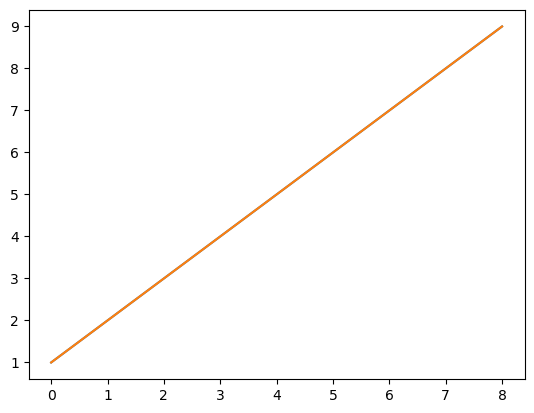

In [61]:
df['A'].plot()
plt.show()

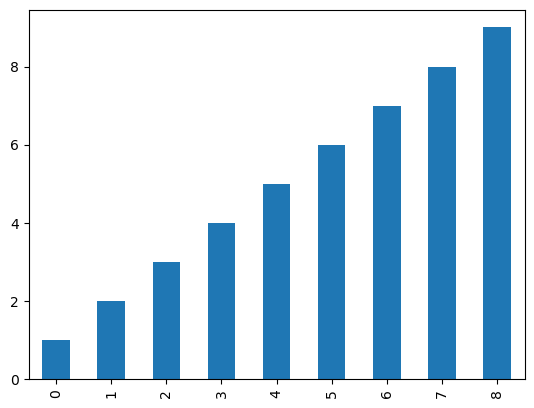

In [63]:
df['A'].plot(kind='bar')
plt.show()

ఈ అవలోకనం Pandas యొక్క అత్యంత ముఖ్యమైన భావనలను కవర్ చేస్తుంది, అయితే, లైబ్రరీ చాలా సమృద్ధిగా ఉంది, మరియు మీరు దానితో చేయగలిగే వాటికి ఎలాంటి పరిమితి లేదు! ఇప్పుడు ఈ జ్ఞానాన్ని నిర్దిష్ట సమస్యను పరిష్కరించడానికి ఉపయోగిద్దాం.


---

<!-- CO-OP TRANSLATOR DISCLAIMER START -->
**అస్పష్టత**:  
ఈ పత్రాన్ని AI అనువాద సేవ [Co-op Translator](https://github.com/Azure/co-op-translator) ఉపయోగించి అనువదించబడింది. మేము ఖచ్చితత్వానికి ప్రయత్నించినప్పటికీ, ఆటోమేటెడ్ అనువాదాల్లో పొరపాట్లు లేదా తప్పిదాలు ఉండవచ్చు. మూల పత్రం దాని స్వదేశీ భాషలో అధికారిక మూలంగా పరిగణించాలి. ముఖ్యమైన సమాచారానికి, ప్రొఫెషనల్ మానవ అనువాదం సిఫార్సు చేయబడుతుంది. ఈ అనువాదం వాడకం వల్ల కలిగే ఏవైనా అపార్థాలు లేదా తప్పుదారుల కోసం మేము బాధ్యత వహించము.
<!-- CO-OP TRANSLATOR DISCLAIMER END -->
